Imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Carregar o Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((img_treino, id_treino),(img_teste, id_teste)) = dataset.load_data()

Explorar os Dados

In [3]:
len(img_treino)
img_treino.shape
img_teste.shape
len(id_treino)
len(id_teste)
id_treino
id_treino.min()
id_treino.max()

9

Primeira exibição de Dados

Text(0.5, 1.0, '9')

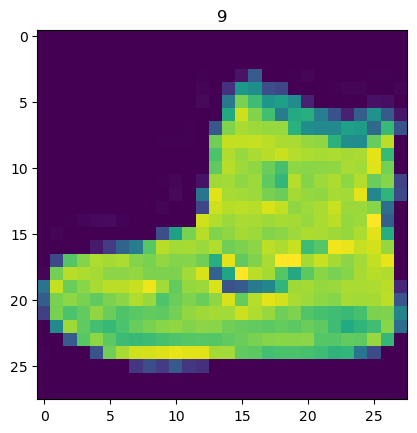

In [4]:
plt.imshow(img_treino[0])
plt.title(id_treino[0])

Exibir os Dados

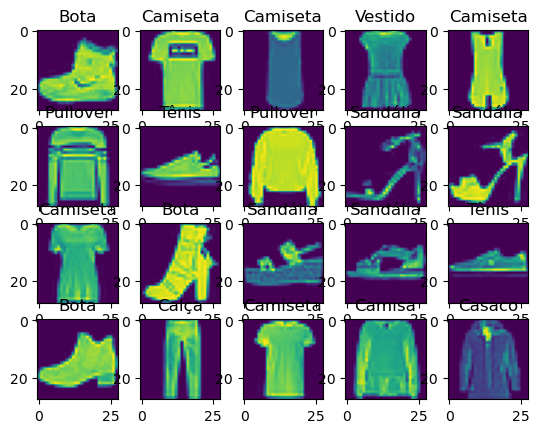

In [5]:
total_classificacoes = 20
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 
                        'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(20):
    plt.subplot(4, 5, imagem+1)
    plt.imshow(img_treino[imagem])
    plt.title(nomes_classificacoes[id_treino[imagem]])

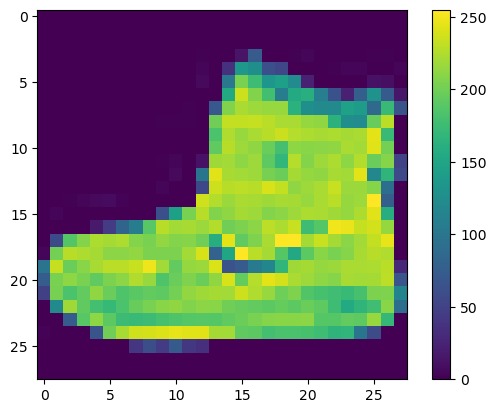

In [6]:
plt.imshow(img_treino[0])
plt.colorbar()

Normalizando as Imagens

In [7]:
img_treino = img_treino/float(255)

Criando, compilando, treinando e normalizando o Modelo

In [8]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(128, activation=tensorflow.nn.relu),
    #keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = modelo.fit(img_treino, id_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5290 - accuracy: 0.8130 - val_loss: 0.4053 - val_accuracy: 0.8573
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3997 - accuracy: 0.8534 - val_loss: 0.3696 - val_accuracy: 0.8633
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3616 - accuracy: 0.8682 - val_loss: 0.3522 - val_accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8745 - val_loss: 0.3716 - val_accuracy: 0.8656
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3227 - accuracy: 0.8813 - val_loss: 0.3372 - val_accuracy: 0.8787


Resumo do modelo

In [9]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da Primeira Camada Dense

In [10]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.04455631, -0.0019503 , -0.02281368, ..., -0.03719581,
        -0.07593392, -0.00083553],
       [ 0.04526609, -0.06392154, -0.05207327, ...,  0.00746604,
        -0.08582015, -0.10331751],
       [ 0.06752969, -0.08251408, -0.221602  , ...,  0.06113067,
        -0.00964484,  0.05806342],
       ...,
       [ 0.03355861,  0.06177029, -0.2918822 , ..., -0.00580436,
        -0.02372157,  0.11205109],
       [ 0.18258409, -0.01880321, -0.1667883 , ...,  0.00489774,
         0.06518307,  0.22588477],
       [ 0.1743049 ,  0.01019592, -0.1844654 , ..., -0.01750851,
         0.1405873 ,  0.02902388]], dtype=float32)

In [11]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

In [12]:
modelo.layers[1].get_weights()
pesos_camada_dense_aleatorios

array([[0.21963301, 0.98046622, 0.38294951, ..., 0.3026455 , 0.06639852,
        0.59072944],
       [0.34292367, 0.98711813, 0.96972776, ..., 0.87164748, 0.13126777,
        0.85793009],
       [0.81964979, 0.98979891, 0.5193579 , ..., 0.41063619, 0.0667639 ,
        0.15909536],
       ...,
       [0.65759106, 0.0358284 , 0.12109258, ..., 0.761223  , 0.6205928 ,
        0.44574776],
       [0.71872632, 0.62454196, 0.83277142, ..., 0.57412608, 0.55281793,
        0.41180254],
       [0.34784243, 0.93355146, 0.55124885, ..., 0.3878139 , 0.65980308,
        0.86914521]])

In [13]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [14]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [15]:
'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)    
modelo.layers[1].get_weights()

[array([[0.21963301, 0.98046625, 0.3829495 , ..., 0.3026455 , 0.06639852,
         0.5907294 ],
        [0.34292367, 0.9871181 , 0.96972775, ..., 0.8716475 , 0.13126777,
         0.85793006],
        [0.8196498 , 0.9897989 , 0.5193579 , ..., 0.4106362 , 0.06676389,
         0.15909536],
        ...,
        [0.65759104, 0.0358284 , 0.12109258, ..., 0.761223  , 0.6205928 ,
         0.44574776],
        [0.71872634, 0.62454194, 0.8327714 , ..., 0.57412606, 0.55281794,
         0.41180253],
        [0.34784243, 0.93355143, 0.55124885, ..., 0.3878139 , 0.6598031 ,
         0.8691452 ]], dtype=float32),
 array([ 0.05352723,  0.3052203 ,  0.02040905,  0.05175256,  0.3345188 ,
        -0.05530377, -0.15231831,  0.29289383, -0.27937946, -0.02017547,
        -0.0156171 , -0.08120297,  0.07937405, -0.08691252, -0.25093   ,
         0.06827845,  0.22973631,  0.30199724, -0.22636642, -0.08249833,
         0.13479486,  0.1993636 , -0.01751724,  0.19961452,  0.02112106,
         0.1171746 ,  0.08441

In [16]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = modelo.fit(img_treino, id_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 80.9521 - accuracy: 0.4229 - val_loss: 13.2725 - val_accuracy: 0.7020
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 22.6602 - accuracy: 0.6312 - val_loss: 7.5036 - val_accuracy: 0.7654
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 10.1330 - accuracy: 0.6858 - val_loss: 4.2482 - val_accuracy: 0.7784
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 5.0604 - accuracy: 0.7176 - val_loss: 2.3761 - val_accuracy: 0.8011
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.7697 - accuracy: 0.7470 - val_loss: 1.7861 - val_accuracy: 0.8114


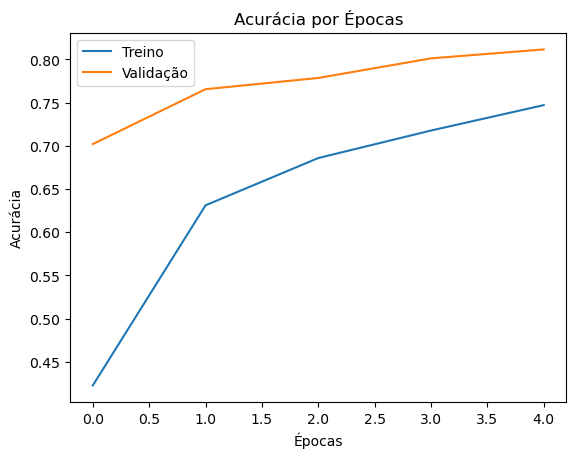

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

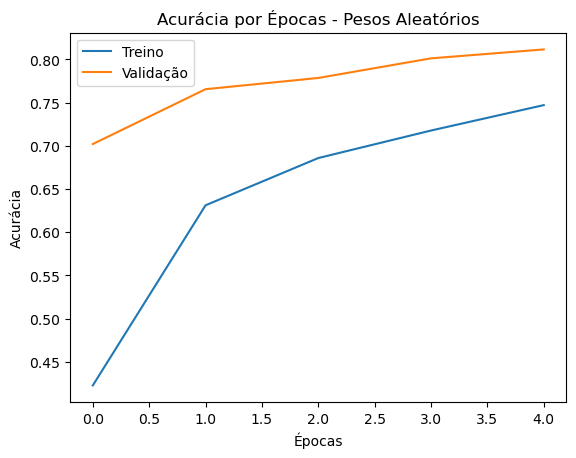

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas - Pesos Aleatórios')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

In [19]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

Salvando e carregando o Modelo treinado

In [20]:
modelo.save('Modelo.h5')
modelo_salvo = load_model('Modelo.h5')

Visualizando as Acurácias de Treino e Validação por época

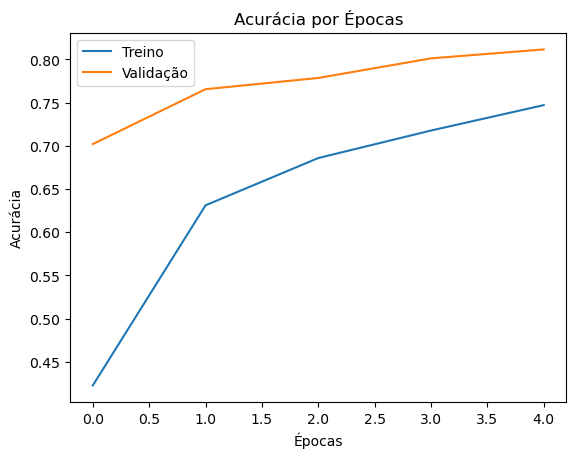

In [21]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

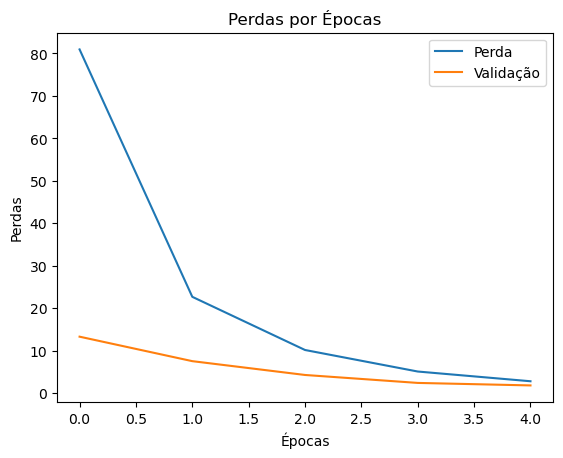

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Perda', 'Validação'])

Visualizando as Perdas de Treino e Validação por época

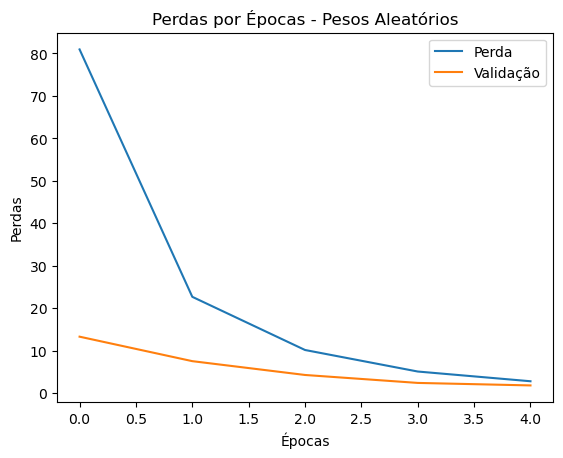

In [23]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas - Pesos Aleatórios')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Perda', 'Validação'])

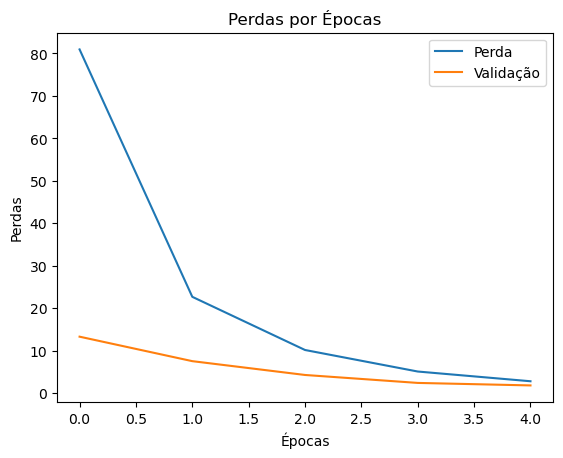

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Perda', 'Validação'])

Testando o Modelo e o Modelo Salvo

In [25]:
testes = modelo.predict(img_teste)
print('Resultado teste:', np.argmax(testes[0]))
print('Número de Imagem de Teste', id_teste[0])

313/313 [==============================] - 0s 1ms/step
Resultado teste: 9
Número de Imagem de Teste 9


In [26]:
testes = modelo.predict(img_teste)
print('Resultado teste:', np.argmax(testes[1]))
print('Número de Imagem de Teste', id_teste[1])

testes_modelo_salvo = modelo_salvo.predict(img_teste)
print('Resultado teste mdo modelo salvo:', np.argmax(testes_modelo_salvo[0]))
print('Número de Imagem de Teste', id_teste[0])

313/313 [==============================] - 0s 1ms/step
Resultado teste: 2
Número de Imagem de Teste 2
313/313 [==============================] - 0s 1ms/step
Resultado teste mdo modelo salvo: 9
Número de Imagem de Teste 9


In [27]:
print('Resultado teste:', np.argmax(testes[21]))
print('Número de Imagem de Teste', id_teste[21])

Resultado teste: 7
Número de Imagem de Teste 5


Avaliando o Modelo

In [28]:
perda_teste, acuracia_teste = modelo.evaluate(img_teste, id_teste)
print('Perda do Teste:', perda_teste)
print('Acuracia do Teste:', acuracia_teste)

313/313 [==============================] - 1s 1ms/step - loss: 480.6880 - accuracy: 0.7831
Perda do Teste: 480.68798828125
Acuracia do Teste: 0.7831000089645386
